In [280]:
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme()
from matplotlib import pyplot as plt

### Q1

Code used to calculate values

In [243]:
P = np.array([[1/2, 1/3, 1/6],[0, 1/3, 2/3],[1/2, 0, 1/2]])
P3 = np.linalg.matrix_power(P,3)
P3[0,1]+2*P3[0,2]

1.074074074074074

### Q2

Solving the linear system

In [244]:
A = np.array([[1,0,-1,0,0,0],[0,-1/4,1,-1/4,-1/4,0],[0,1,-1,0,0,0],[0,0,-1/2,1,0,-1/2],[0,0,-1/2,0,1,-1/2],[0,0,0,-1/2,-1/2,1]])
B = np.array([1,1,1,1,1,1])
A

array([[ 1.  ,  0.  , -1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.25,  1.  , -0.25, -0.25,  0.  ],
       [ 0.  ,  1.  , -1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  , -0.5 ,  1.  ,  0.  , -0.5 ],
       [ 0.  ,  0.  , -0.5 ,  0.  ,  1.  , -0.5 ],
       [ 0.  ,  0.  ,  0.  , -0.5 , -0.5 ,  1.  ]])

In [245]:
np.linalg.solve(A,B)

array([12., 12., 11., 14., 14., 15.])

In [272]:
P = [[0,0,1,0,0,0],[0,0,1,0,0,0],[1/4,1/4,0,1/4,1/4,0],[0,0,1/2,0,0,1/2],[0,0,1/2,0,0,1/2],[0,0,0,1/2,1/2,0]]
print(P)
steps = []
Pjj = np.zeros([20,6])
for n_steps in range(20):
    steps.append(n_steps+1)
    P_m = np.linalg.matrix_power(P,n_steps+1)
    Pjj[n_steps,:] = np.diagonal(P_m)

[[0, 0, 1, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0.25, 0.25, 0, 0.25, 0.25, 0], [0, 0, 0.5, 0, 0, 0.5], [0, 0, 0.5, 0, 0, 0.5], [0, 0, 0, 0.5, 0.5, 0]]


Proving periodicity

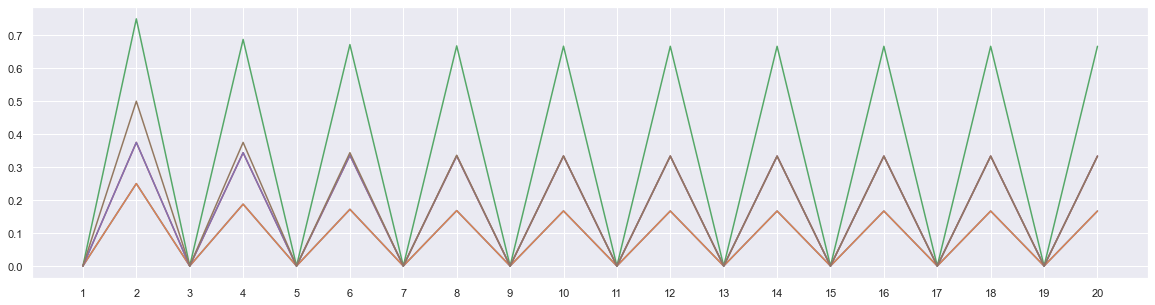

In [284]:
plt.figure(figsize=[20,5])
sns.lineplot(steps,Pjj[:,0])
sns.lineplot(steps,Pjj[:,1])
sns.lineplot(steps,Pjj[:,2])
sns.lineplot(steps,Pjj[:,3])
sns.lineplot(steps,Pjj[:,4])
sns.lineplot(steps,Pjj[:,5])
plt.xticks(steps);

### Q3

[[0.   0.6  0.4 ]
 [0.3  0.   0.7 ]
 [0.85 0.15 0.  ]]
2.863630075240405


c:\users\marti\pycharmprojects\uncertainty-projects\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


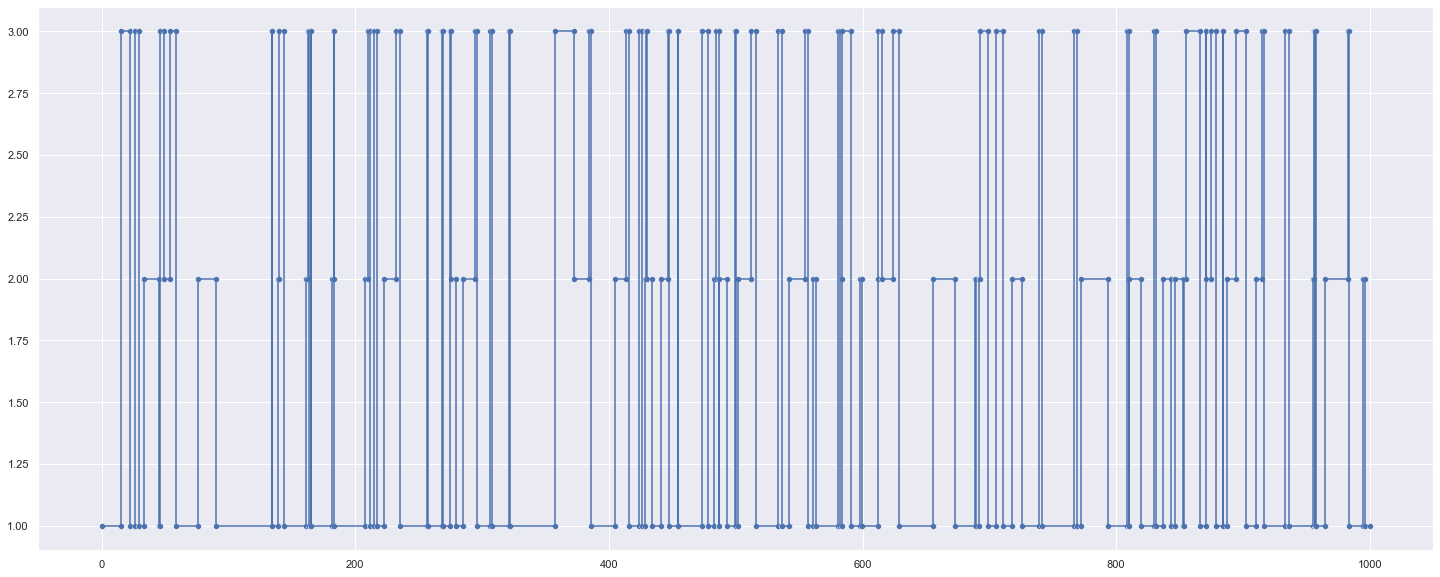

In [247]:
t = 0
states = [1]
times = [0]
areas = []
choices = [1,2,3]
intervals = [1/0.1, 1/0.2, 1/0.3]
P = np.array([[0,0.6,0.4],[0.3,0,0.7],[0.85,0.15,0]])
print(P)
t_end = 1000
while t < t_end:
    interval = np.random.exponential(intervals[int(states[-1]-1)])
    areas.append(states[-1]**2*interval)
    t = interval + times[-1]
    times.append(t-1e-12)
    states.append(states[-1])

    p = P[int(states[-1]-1),:]
    times.append(t)
    states.append(np.random.choice(choices, p = p))

times[-2:] = []
states[-2:] = []
times.append(t_end)
states.append(states[-1])

areas[-1] = (times[-1] - times[-2]) * states[-1]

plt.figure(figsize=[25,10])
sns.lineplot(x=times,y=states)
sns.scatterplot(times,states)

print(np.sum(areas)/t_end)


Using numpy linear squares solver for over-determined system

In [ ]:
A_2 = np.array([[-1,0.3,0.85],[0.6,-1,0.15],[0.4,0.7,-1],[1,1,1]])
B_2 = np.array([0,0,0,1])
print(A_2)

sds = np.linalg.lstsq(A_2,B_2)[0]
sdf1, sdf2, sdf3 = sds[0]/0.1, sds[1]/0.2, sds[2]/0.3
sum_sdf = (sdf1 + sdf2 + sdf3)
sd1 = sdf1/sum_sdf
sd2 = sdf2/sum_sdf
sd3 = sdf3/sum_sdf
print(sd1)
print(sd2)
print(sd3)

In [250]:
lrar = sd1 + 4*sd2 + 9*sd3
print(lrar)

3.1201334816462736


Simulating long run average reward (Monte Carlo)

In [251]:
n_trials = 10000
rewards = []
t_end = 5000
for i in range(n_trials):
    t = 0
    states = [1]
    times = [0]
    areas = []
    while t < t_end:
        interval = np.random.exponential(intervals[int(states[-1]-1)])
        areas.append(states[-1]**2*interval)
        t = interval + times[-1]
        times.append(t-1e-12)
        states.append(states[-1])

        p = P[int(states[-1]-1),:]
        times.append(t)
        states.append(np.random.choice(choices, p = p))

    times[-2:] = []
    states[-2:] = []
    times.append(t_end)
    states.append(states[-1])

    # areas[-1] = (times[-1] - times[-2]) * states[-1]
    rewards.append(np.sum(areas)/t_end)

In [252]:
print(np.mean(rewards))
print(np.mean(rewards) - lrar)

3.1223687877786666
0.002235306132392978
